# Basic data analysis tasks

- Data: Fitness in Arabidopsis recombinant inbred lines
- Data input: CSV files, missing data
- Data description: Summary statistics, plots
- Modeling: Linear regression

## Example: Fitness measured in Arabidopsis recombinant inbred lines

Topics: Reading data, JIT compiler, missing data, summary statistics, plots, linear regression 

In [1]:
using Statistics, CSV, Plots, DataFrames, GLM

## Reading data

In [2]:
agrenURL = "https://raw.githubusercontent.com/sens/smalldata/master/arabidopsis/agren2013.csv"
agren = CSV.read(download(agrenURL),DataFrame,missingstring="NA");
first(agren,10)

,it09,it10,it11,sw09,sw10,sw11,id,flc
,Float64?,Float64?,Float64,Float64?,Float64?,Float64,Int64,Int64
1,19.7616,24.1761,15.6778,5.66443,21.4804,4.47778,1,1
2,6.28846,1.77401,3.23889,9.54305,22.1222,7.76667,2,2
3,12.034,12.4605,10.601,11.8038,23.0487,14.8712,3,2
4,20.1253,14.1169,12.9035,7.44263,22.5834,8.1937,6,1
5,15.1278,13.2925,15.0646,6.89696,22.1404,8.4891,7,1
6,19.2091,13.9549,12.9868,8.39536,25.5612,8.08018,8,1
7,12.9434,11.9672,11.4831,12.014,24.298,18.1587,11,2
8,14.2244,5.45326,5.124,8.51941,22.8739,19.51,13,1
9,20.5921,14.8691,11.1797,6.51861,21.5116,8.03754,14,1


A set of Arabidopsis recombinant inbred lines were derived from a cross of two
parents from Italy and Sweden.  They were grown in three years
(2009-2011) in Italy and Sweden.  The phenotype is the average number
of seeds per plant for each line which is a measure of fitness.

Column names:

- id: ID of RI line (first two are the parents)
- it09: Italy 2009
- it10: Italy 2010
- it11: Italy 2011
- sw09: Sweden 2009
- sw10: Sweden 2010
- sw11: Sweden 2011


Reference:

J Ågren, CG Oakley, JK McKay, JT Lovell, DW Schemske. 2013. Genetic
mapping of adaptation reveals fitness trade-offs in Arabidopsis
thaliana. Proceedings of the National Academy of Sciences 110:
21077-21082.



## Data description

In [3]:
describe(agren)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,Type
1,it09,12.2106,6.28846,12.0582,20.5921,6,"Union{Missing, Float64}"
2,it10,8.08256,1.77401,7.53993,24.1761,2,"Union{Missing, Float64}"
3,it11,8.92073,3.23889,8.52447,19.3107,0,Float64
4,sw09,10.8503,5.66443,10.832,15.0012,6,"Union{Missing, Float64}"
5,sw10,23.3658,19.2318,23.0893,34.1327,2,"Union{Missing, Float64}"
6,sw11,13.4934,4.47778,12.8102,32.1889,0,Float64
7,id,325.637,1,313.5,700,0,Int64
8,flc,1.535,1,2.0,2,0,Int64


## Calculating summary statistics

In [4]:
# calculate mean skipping any missing values
mean(skipmissing(agren.it09))

12.210566789309647

In [5]:
# calculate the mean of all columns skipping missing values
mean.(skipmissing.(eachcol(agren)))

8-element Vector{Float64}:
  12.210566789309647
   8.082563855927145
   8.920732948515003
  10.850313666266498
  23.36584553505025
  13.493410758197498
 325.6375
   1.535

## Visualization: histogram

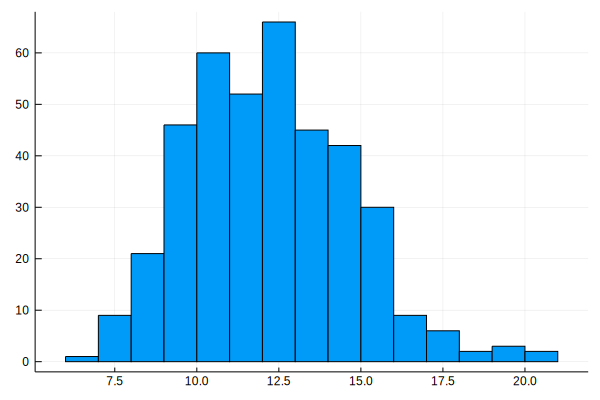

In [6]:
# histogram of one trait
histogram(Float64.(skipmissing(agren.it09)),lab="")

## Visualization: scatterplot

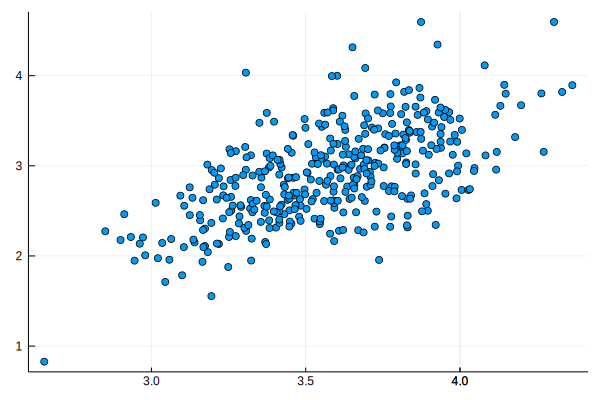

In [7]:
# scatterplot of two traits
scatter(log2.(agren.it09),log2.(agren.it10),lab="")

## Modeling: linear regression

We now perform linear regression of the fitness values in Italy in 2011 on the fitness in 
Italy in 2009, adjusting for FLC genotype.

The syntax is similar to R; the formula has to be indicated using the `@formula` macro.

In [8]:
out0 = lm(@formula(it11~it09+flc),agren)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

it11 ~ 1 + it09 + flc

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)   1.32384    0.617786    2.14    0.0327   0.109246   2.53844
it09          0.644665   0.0408089  15.80    <1e-43   0.564433   0.724897
flc          -0.191375   0.19962    -0.96    0.3383  -0.583837   0.201088
─────────────────────────────────────────────────────────────────────────

## Extracting information

In [9]:
coef(out0)

3-element Vector{Float64}:
  1.3238442023474766
  0.6446651610115701
 -0.19137472009472786

In [10]:
vcov(out0)

3×3 Matrix{Float64}:
  0.38166    -0.0215339    -0.0708066
 -0.0215339   0.00166536    0.000779437
 -0.0708066   0.000779437   0.0398481

## Residual plots

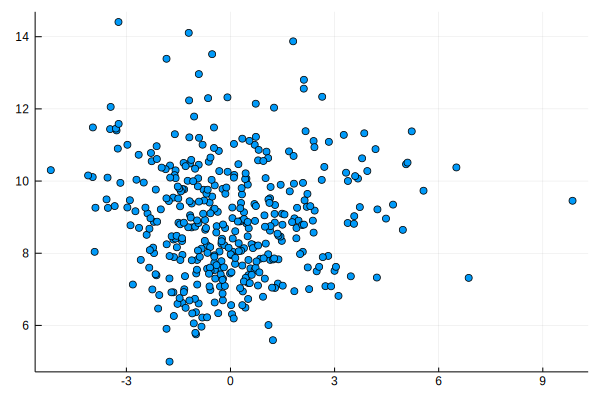

In [11]:
scatter(residuals(out0),predict(out0),lab="")

## GLM

In [12]:
out1 = glm(@formula( it11 ~ log(it09) ),agren,Normal(),LogLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Normal{Float64}, LogLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

it11 ~ 1 + :(log(it09))

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0167844   0.14326    -0.12    0.9067  -0.29757    0.264001
log(it09)     0.88134     0.0559823  15.74    <1e-55   0.771617   0.991063
──────────────────────────────────────────────────────────────────────────

## Chaining and automation of model fitting

Suppose we want to regress the fitness in Sweden on fitness in Italy in the 
same year adjusting for FLC.  We can do this using chaining.  First we get the
variable names as strings.

In [13]:
# the years
yr = ["09","10","11"]
# construct names by concatnating strings
sw = ("sw" .* yr);
it = ("it" .* yr);
[sw, it]

2-element Vector{Vector{String}}:
 ["sw09", "sw10", "sw11"]
 ["it09", "it10", "it11"]

In [14]:
# construct models from the strings
models = Term.(Symbol.(sw)) .~ Term.(Symbol.(it)) .+ Term.(:flc)

3-element Vector{FormulaTerm{Term, Tuple{Term, Term}}}:
 sw09 ~ it09 + flc
 sw10 ~ it10 + flc
 sw11 ~ it11 + flc

In [15]:
# apply the lm function on each of the models, and then pipe to get the coefficient table
broadcast( m->lm(m,agren), models )  .|> coeftable

3-element Vector{StatsBase.CoefTable}:
 ────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  11.5007      0.439196   26.19    <1e-87  10.6372     12.3642
it09         -0.0323098   0.0290118  -1.11    0.2661  -0.0893484   0.0247287
flc          -0.166348    0.141913   -1.17    0.2418  -0.445357    0.112661
────────────────────────────────────────────────────────────────────────────
 ───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  22.9014      0.409458   55.93    <1e-99  22.0964     23.7064
it10          0.0709767   0.0286537   2.48    0.0137   0.0146438   0.12731
flc          -0.0711718   0.179746   -0.40    0

In [16]:
# a more complex example using glm, and using the @. macro for chaining
( @. Term(Symbol(sw)) ~ Term(Symbol(it)) + Term(:flc) ) .|> ( m->glm(m,agren,Normal(),LogLink()) ) .|> coeftable

3-element Vector{StatsBase.CoefTable}:
 ──────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error      z  Pr(>|z|)    Lower 95%   Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)   2.44399     0.0403901   60.51    <1e-99   2.36482     2.52315
it09         -0.00292266  0.00267998  -1.09    0.2755  -0.00817533  0.00233001
flc          -0.0157048   0.0130643   -1.20    0.2293  -0.0413104   0.00990072
──────────────────────────────────────────────────────────────────────────────
 ────────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       z  Pr(>|z|)     Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)   3.13196     0.0174432   179.55    <1e-99   3.09777      3.16615
it10          0.00297075  0.0012085     2.46    0.0140   0.000602132  0.00533937
flc    

## Generating random numbers

In [17]:
using Random
using Distributions

In [18]:
# initialize random number generator
rnd = MersenneTwister(100)
# Draw uniform (0,1) numbers in 4x4 matrix
rand(Cauchy(),4,4)

4×4 Matrix{Float64}:
 -7.58382      0.581556   0.620802  0.360067
 -5.55343      7.20588    9.40243   1.21663
 -8.91005     -9.16916   -1.55499   0.878696
  0.00442865   1.25381   -2.64062   0.371543

## Calculating probabilities and densities

Calculating the CDF of the normal distribution

In [19]:
cdf(Cauchy(0,1),1.96)

0.8498285541119834

Quantiles of the normal distribution.

In [20]:
quantile(Normal(),0.95)

1.6448536269514717

Generating random normal variables with mean 0.3 and standard deviation 0.5.

In [21]:
x = rand(Normal(0.3,0.5),1000)

1000-element Vector{Float64}:
 -0.45046598127981746
  0.23134421258882393
  0.2517271102039687
 -0.5728252933073521
  0.43493558464975157
  0.213012013933084
  0.3421748432166778
 -0.27338211103715276
  0.5047833624899034
 -0.0755106919393046
  1.4504780925337375
  0.13648212828722928
 -0.6281694855786075
  ⋮
 -0.2556554701982759
  0.12291775475404931
  0.35515495957438026
  1.1177627331209108
 -0.13532811887806623
  0.43476002987259715
  0.06298287074397868
  0.07067957927768084
  0.9479217516381206
 -0.27746754253213607
 -0.6880452360452243
  0.934102133119902

We now fit the MLE assuming a normal distribution.

In [22]:
normFit = fit_mle(Laplace,x)

Laplace{Float64}(μ=0.29707392015615663, θ=0.5209103192451021)

We generate normal variables with parameters equal to the estimated ones.

In [23]:
rand(normFit,10)

10-element Vector{Float64}:
  0.5546055049393865
  1.433570096640013
  0.1813174020298847
 -0.8250784796119491
 -0.7375658870463838
 -0.11567066405894966
  0.46309400524163624
  1.3986439200195688
  0.22150302351203688
 -0.5009202916969959

## Version info

In [24]:
versioninfo()

Julia Version 1.6.3
Commit ae8452a9e0 (2021-09-23 17:34 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin19.5.0)
  CPU: Intel(R) Core(TM) i5-5287U CPU @ 2.90GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, broadwell)
